## Random Forest Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
# import RFRegressor to carry out regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
# convert string data into integers
data['Sex'] = data['Sex'].replace({'M': 0, 'F': 1}).astype(int)
data['ChestPainType'] = data['ChestPainType'].replace({'ASY': 0, 'TA': 1, 'ATA': 2, 'NAP': 3}).astype(int)
data['ST_Slope'] = data['ST_Slope'].replace({'Flat': 1, 'Up': 2, 'Down': 0}).astype(int)
data['ExerciseAngina'] = data['ExerciseAngina'].replace({'N': 0, 'Y': 1}).astype(int)
data['RestingECG'] = data['RestingECG'].replace({'Normal': 0, 'ST': 1, 'LVH': 2}).astype(int)
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,0,0.0,2,0
1,49,1,3,160,180,0,0,156,0,1.0,1,1
2,37,0,2,130,283,0,1,98,0,0.0,2,0
3,48,1,0,138,214,0,0,108,1,1.5,1,1
4,54,0,3,150,195,0,0,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,1,110,264,0,0,132,0,1.2,1,1
914,68,0,0,144,193,1,0,141,0,3.4,1,1
915,57,0,0,130,131,0,0,115,1,1.2,1,1
916,57,1,2,130,236,0,2,174,0,0.0,1,1


Among the 12 attributes given, 5 attributes had values in string which were converted into integers to be analysed in the regression model.

In [8]:
# data correlation
data.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.055750,-0.140307,0.254399,-0.095282,0.198039,0.213152,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,-0.055750,1.000000,0.165747,-0.005133,0.200092,-0.120076,0.018343,0.189186,-0.190664,-0.105734,0.150693,-0.305445
ChestPainType,-0.140307,0.165747,1.000000,-0.060541,0.089663,-0.120688,-0.039589,0.306123,-0.370652,-0.260650,0.296157,-0.466847
RestingBP,0.254399,-0.005133,-0.060541,1.000000,0.100893,0.070193,0.097661,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,0.200092,0.089663,0.100893,1.000000,-0.260974,0.112095,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,-0.120076,-0.120688,0.070193,-0.260974,1.000000,0.050707,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,0.213152,0.018343,-0.039589,0.097661,0.112095,0.050707,1.000000,0.048552,0.036119,0.114428,-0.078807,0.061011
MaxHR,-0.382045,0.189186,0.306123,-0.112135,0.235792,-0.131438,0.048552,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,-0.190664,-0.370652,0.155101,-0.034166,0.060451,0.036119,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,-0.105734,-0.260650,0.164803,0.050148,0.052698,0.114428,-0.160691,0.408752,1.000000,-0.501921,0.403951


In [9]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

# split data into 70% train set and 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=20)

In [10]:
# apply random forest regression
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

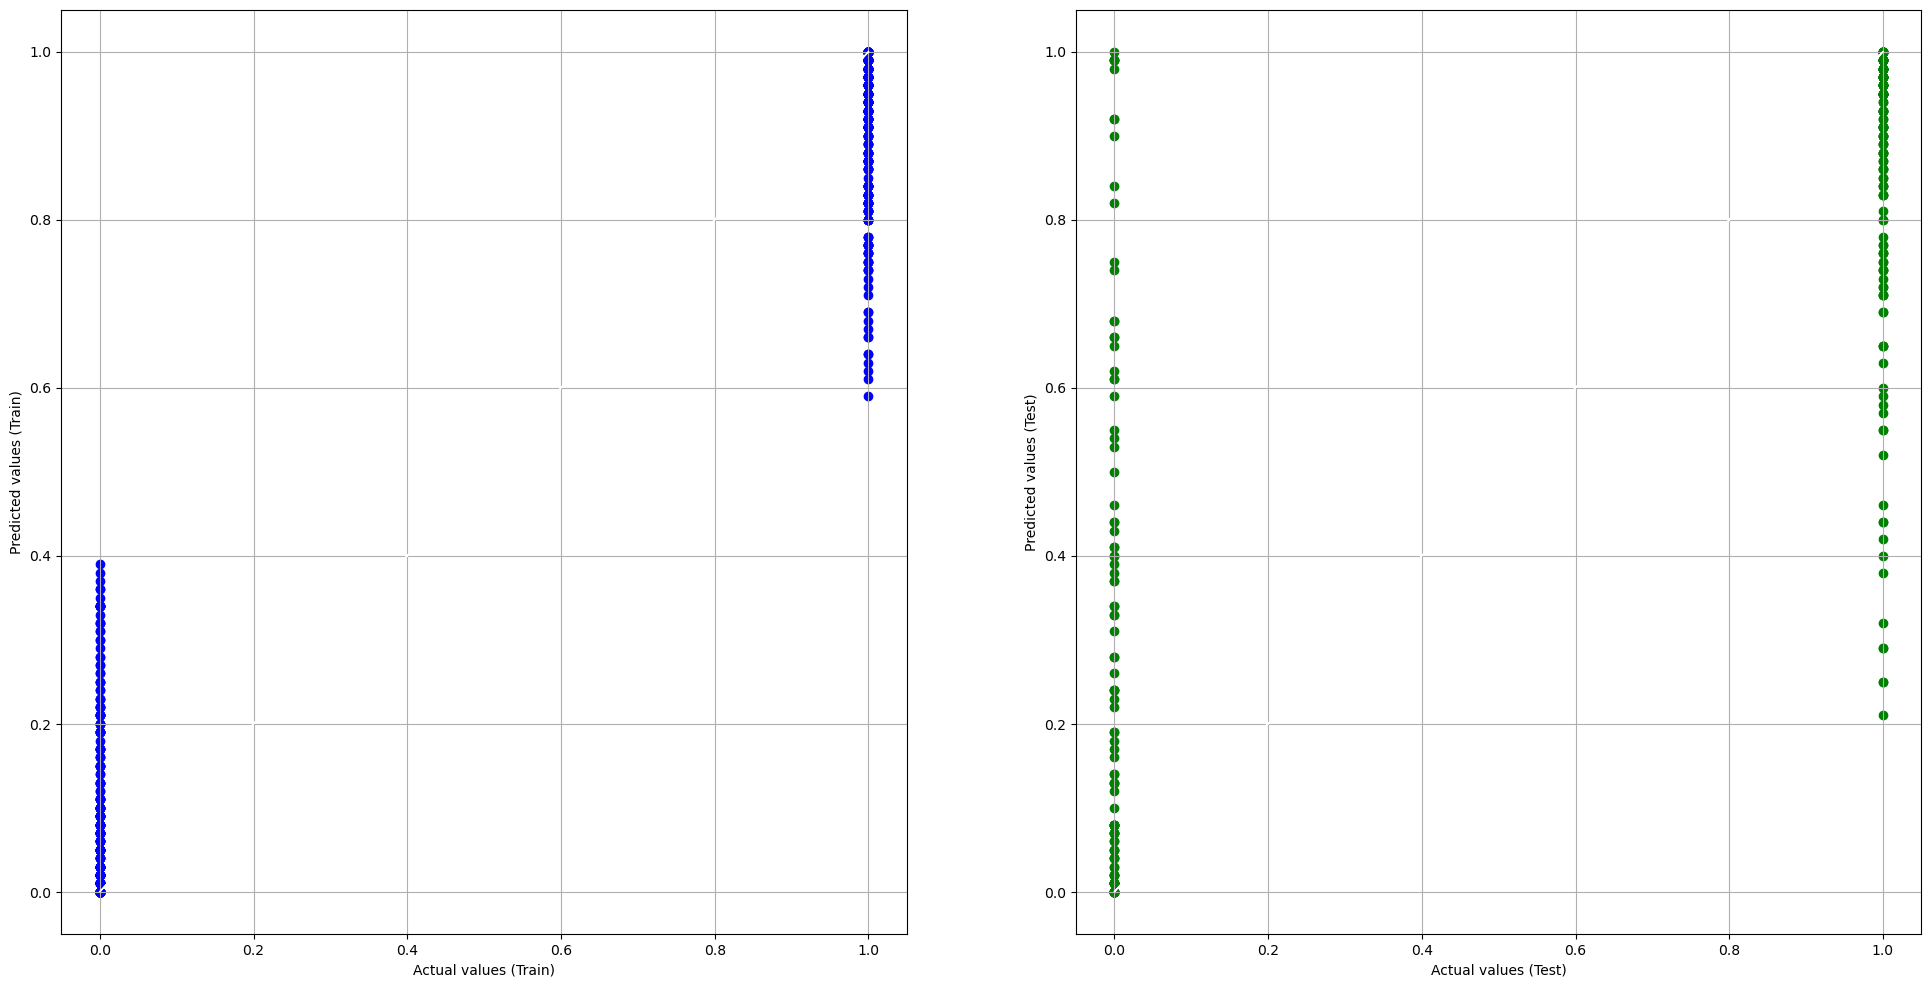

In [13]:
y_train_pred = rf_reg.predict(X_train)
y_test_pred = rf_reg.predict(X_test)

# plot regression model for train and test set
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].grid(True)  # add gridlines for better visualisation
axes[0].set_xlabel("Actual values (Train)")
axes[0].set_ylabel("Predicted values (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].grid(True)  
axes[1].set_xlabel("Actual values (Test)")
axes[1].set_ylabel("Predicted values (Test)")
plt.show()

In [14]:
# analyse performance of random forest regression on train and test set

from sklearn.metrics import r2_score
print("Explained Variance (R^2) on Train Set \t:", rf_reg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Explained Variance (R^2) on Test Set \t:", rf_reg.score(X_test, y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.9364508656751676
Mean Squared Error (MSE) on Train Set 	: 0.015664641744548284
Explained Variance (R^2) on Test Set 	: 0.5891635787137346
Mean Squared Error (MSE) on Test Set 	: 0.10205652173913043


As R^2 increases and MSE decreases on the test set compared to the train set for random forest regression model, we understand that random forest regression may not be the best model for this dataset. 

Nevertheless, we can analyse the dataframe to explore the top ten categories of some of the features given.

<AxesSubplot:xlabel='Age', ylabel='HeartDisease'>

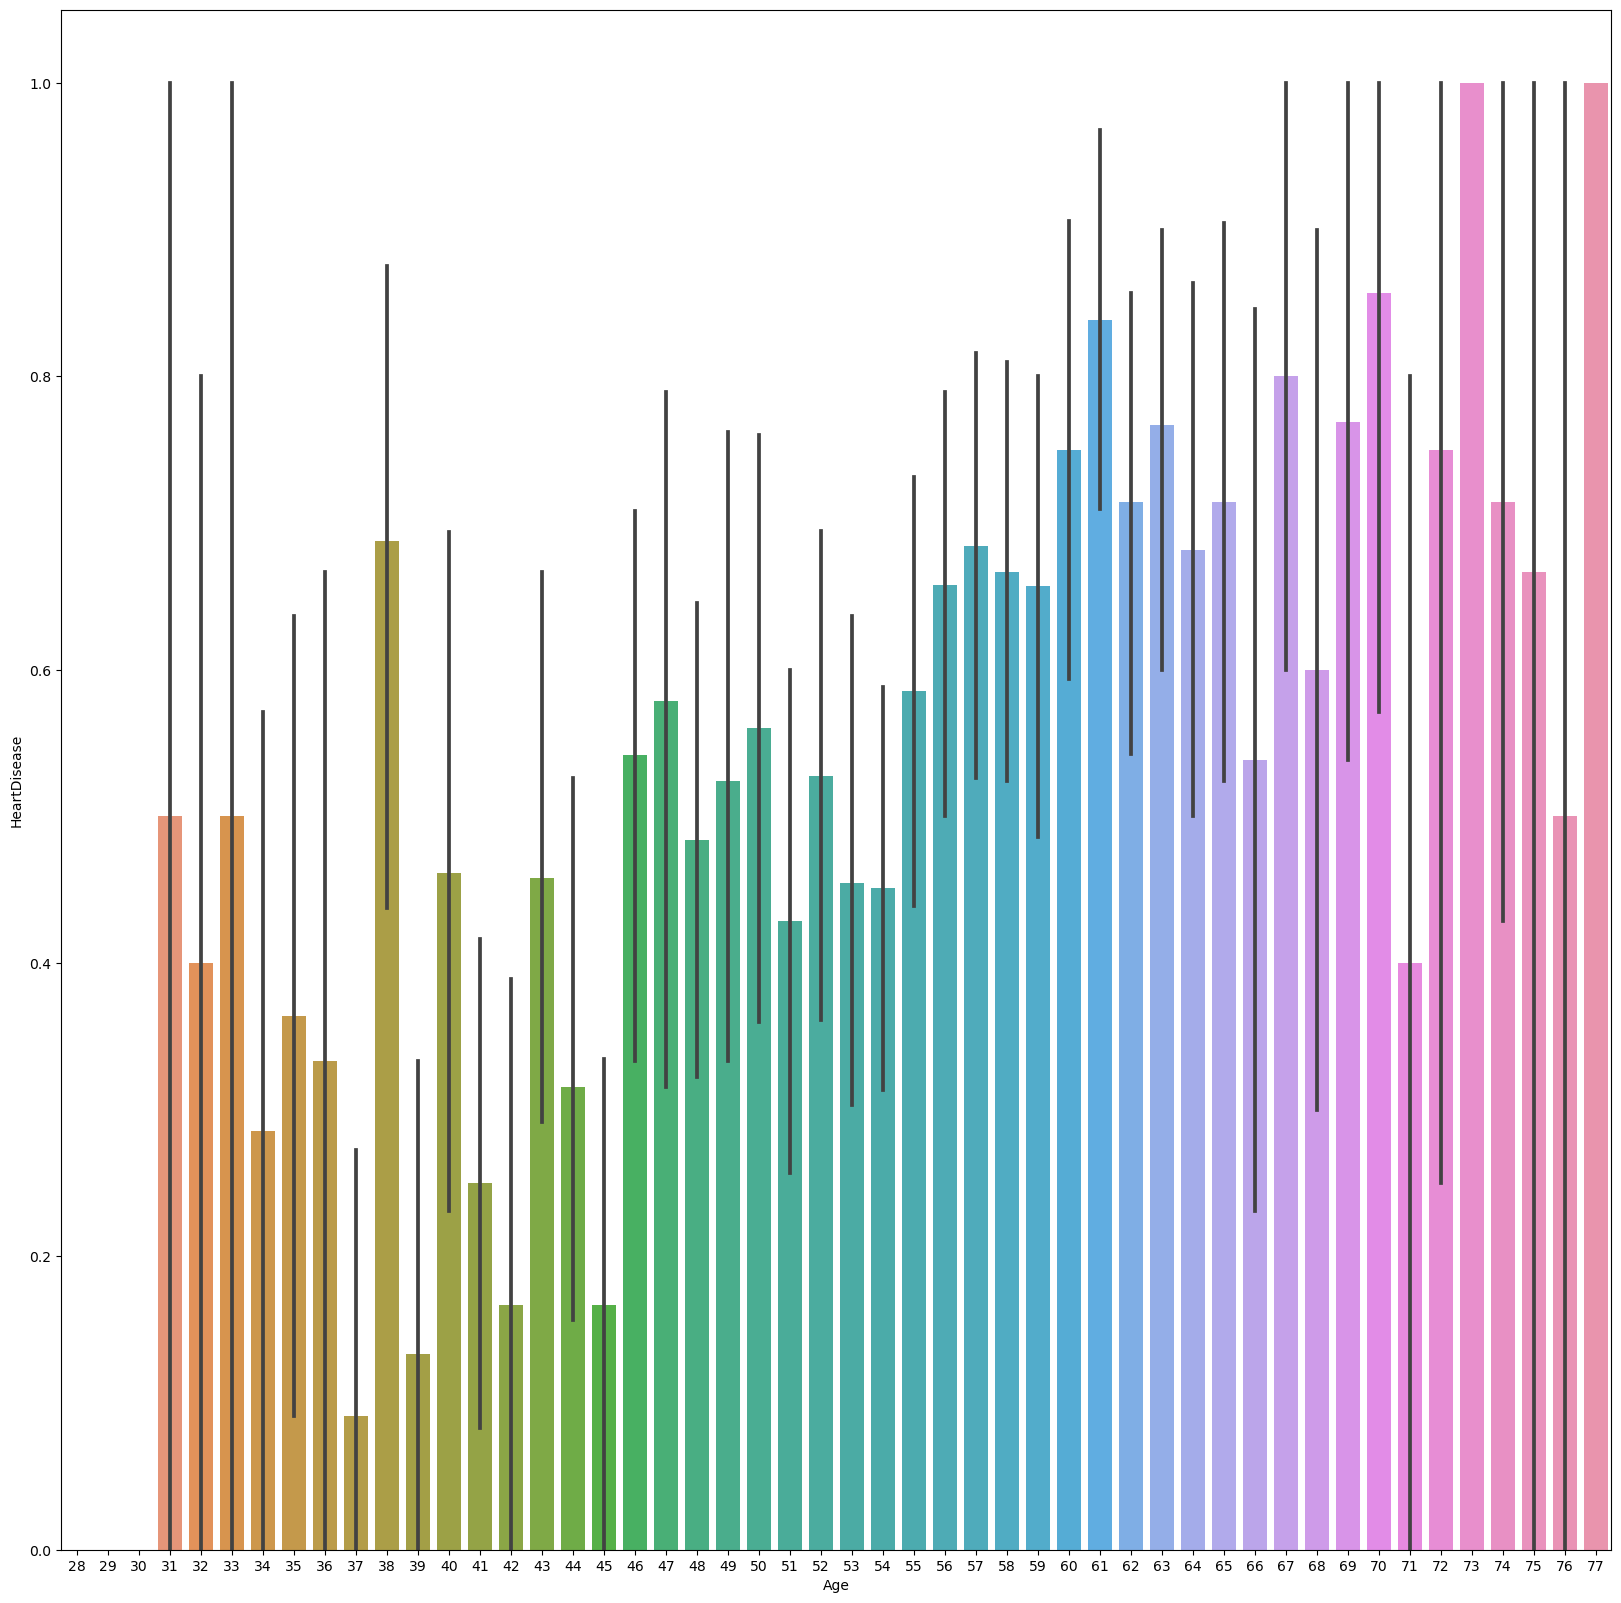

In [15]:
#plot age against heart disease

fig, ax = plt.subplots(figsize=(20, 20))
sb.barplot(ax=ax, x="Age", y="HeartDisease", data=data)

In [16]:
# find top 10 ages of people that suffer from heart disease 

heartDisease_positive_data = data[data['HeartDisease'] == 1]
count_by_age = heartDisease_positive_data.groupby('Age')['HeartDisease'].sum().reset_index()

top_10_by_age = count_by_age.sort_values(by='HeartDisease', ascending=False)
top_10_by_age = top_10_by_age.head(10)
print(top_10_by_age)


    Age  HeartDisease
27   58            28
26   57            26
30   61            26
25   56            25
31   62            25
24   55            24
29   60            24
28   59            23
23   54            23
32   63            23


<AxesSubplot:xlabel='RestingBP', ylabel='HeartDisease'>

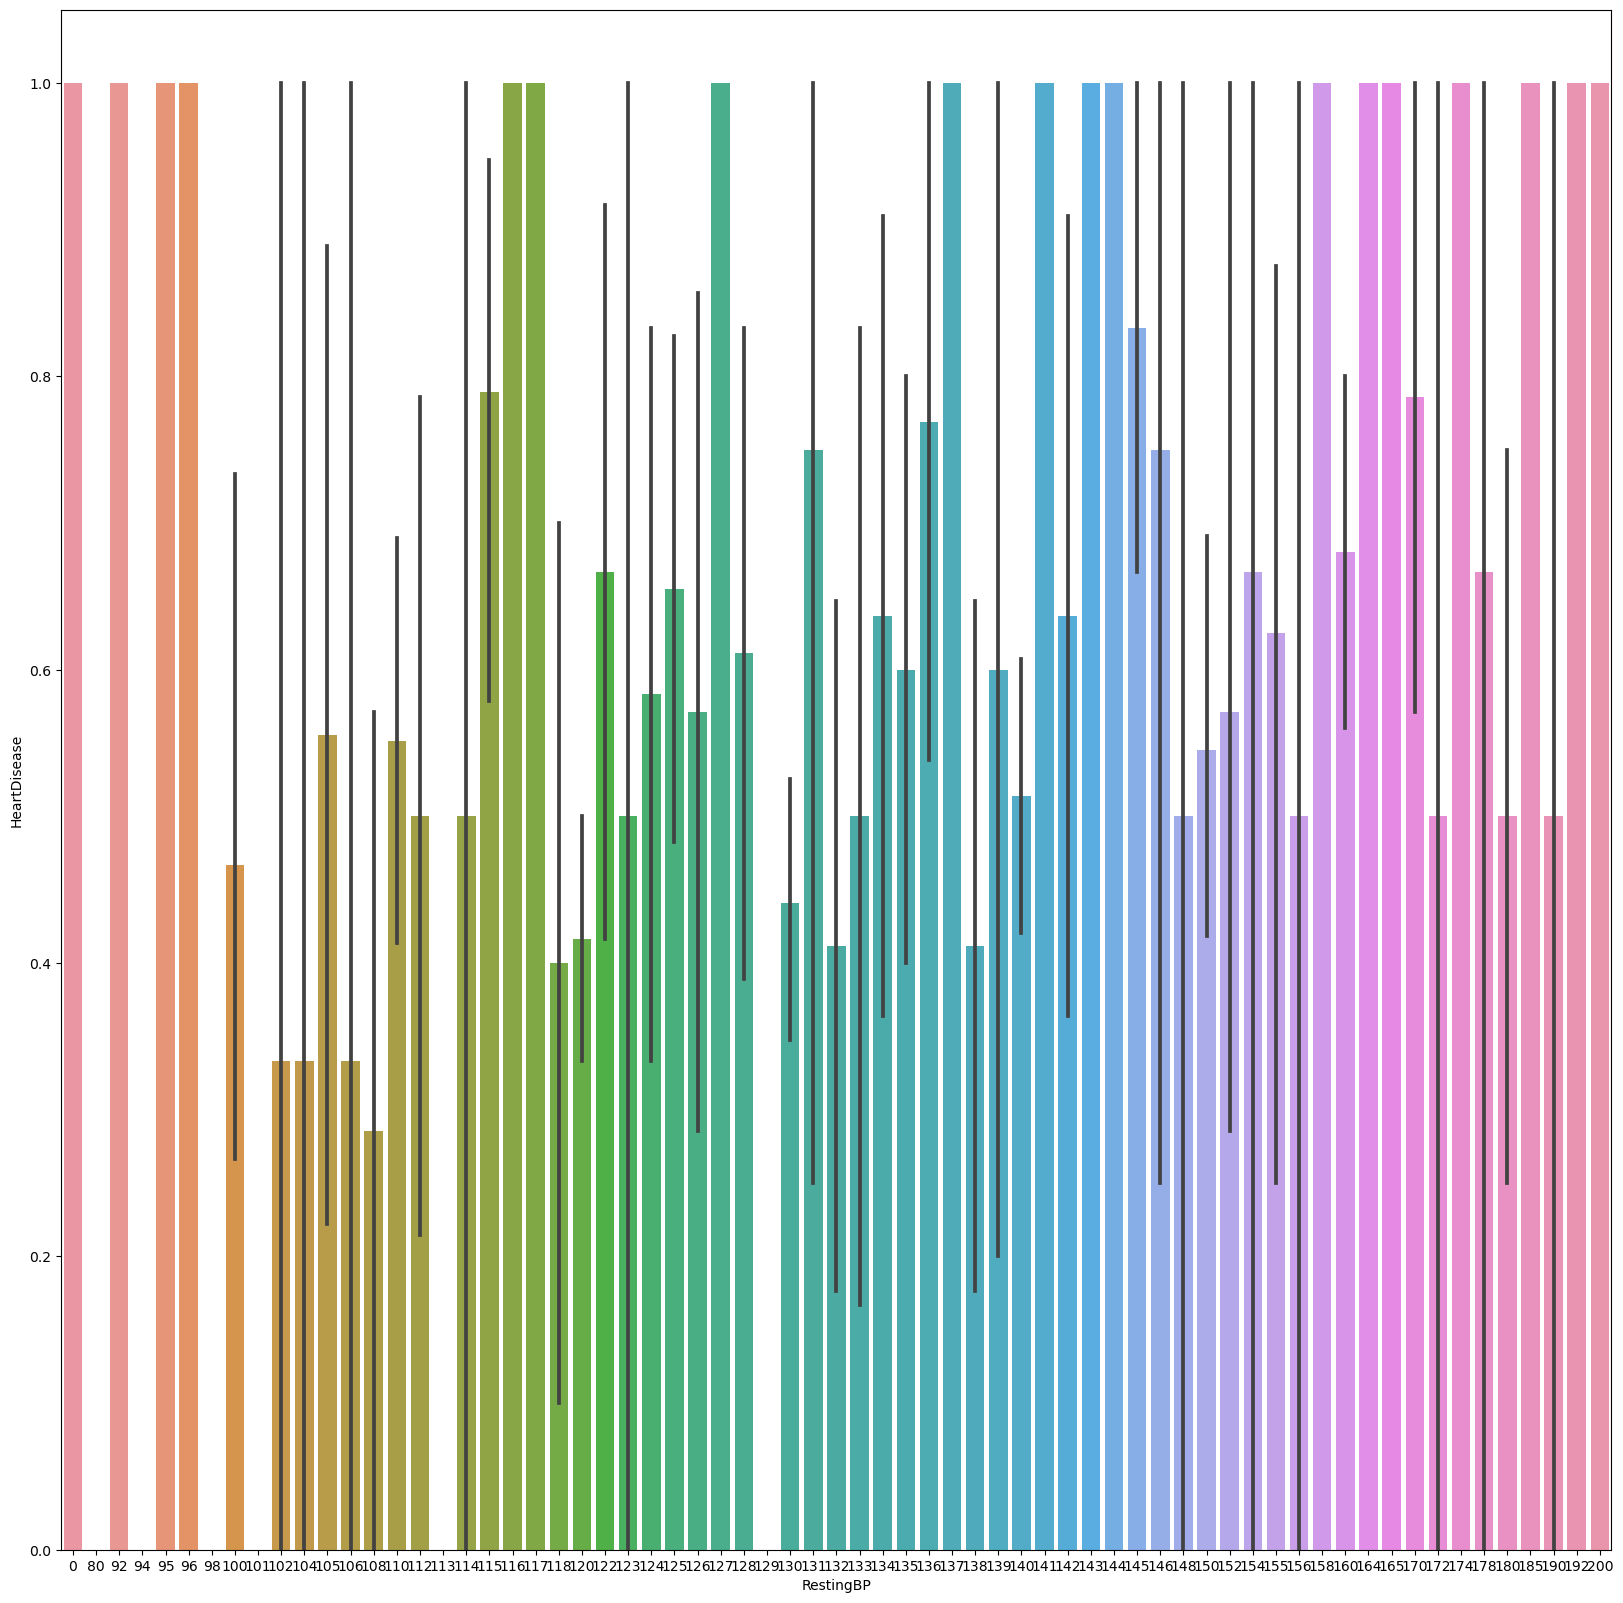

In [17]:
# plot resting blood pressure against heart disease

fig, ax = plt.subplots(figsize=(20, 20))
sb.barplot(ax=ax, x="RestingBP", y="HeartDisease", data=data)

In [18]:
# find top 10 resting bp rates of people that suffer from heart disease 

count_by_bp = heartDisease_positive_data.groupby('RestingBP')['HeartDisease'].sum().reset_index()

top_10_by_bp = count_by_bp.sort_values(by='HeartDisease', ascending=False)
top_10_by_bp = top_10_by_bp.head(10)
print(top_10_by_bp)

    RestingBP  HeartDisease
35        140            55
17        120            55
25        130            52
49        160            34
10        110            32
43        150            30
21        125            19
40        145            15
13        115            15
30        135            12


<AxesSubplot:xlabel='Cholesterol', ylabel='HeartDisease'>

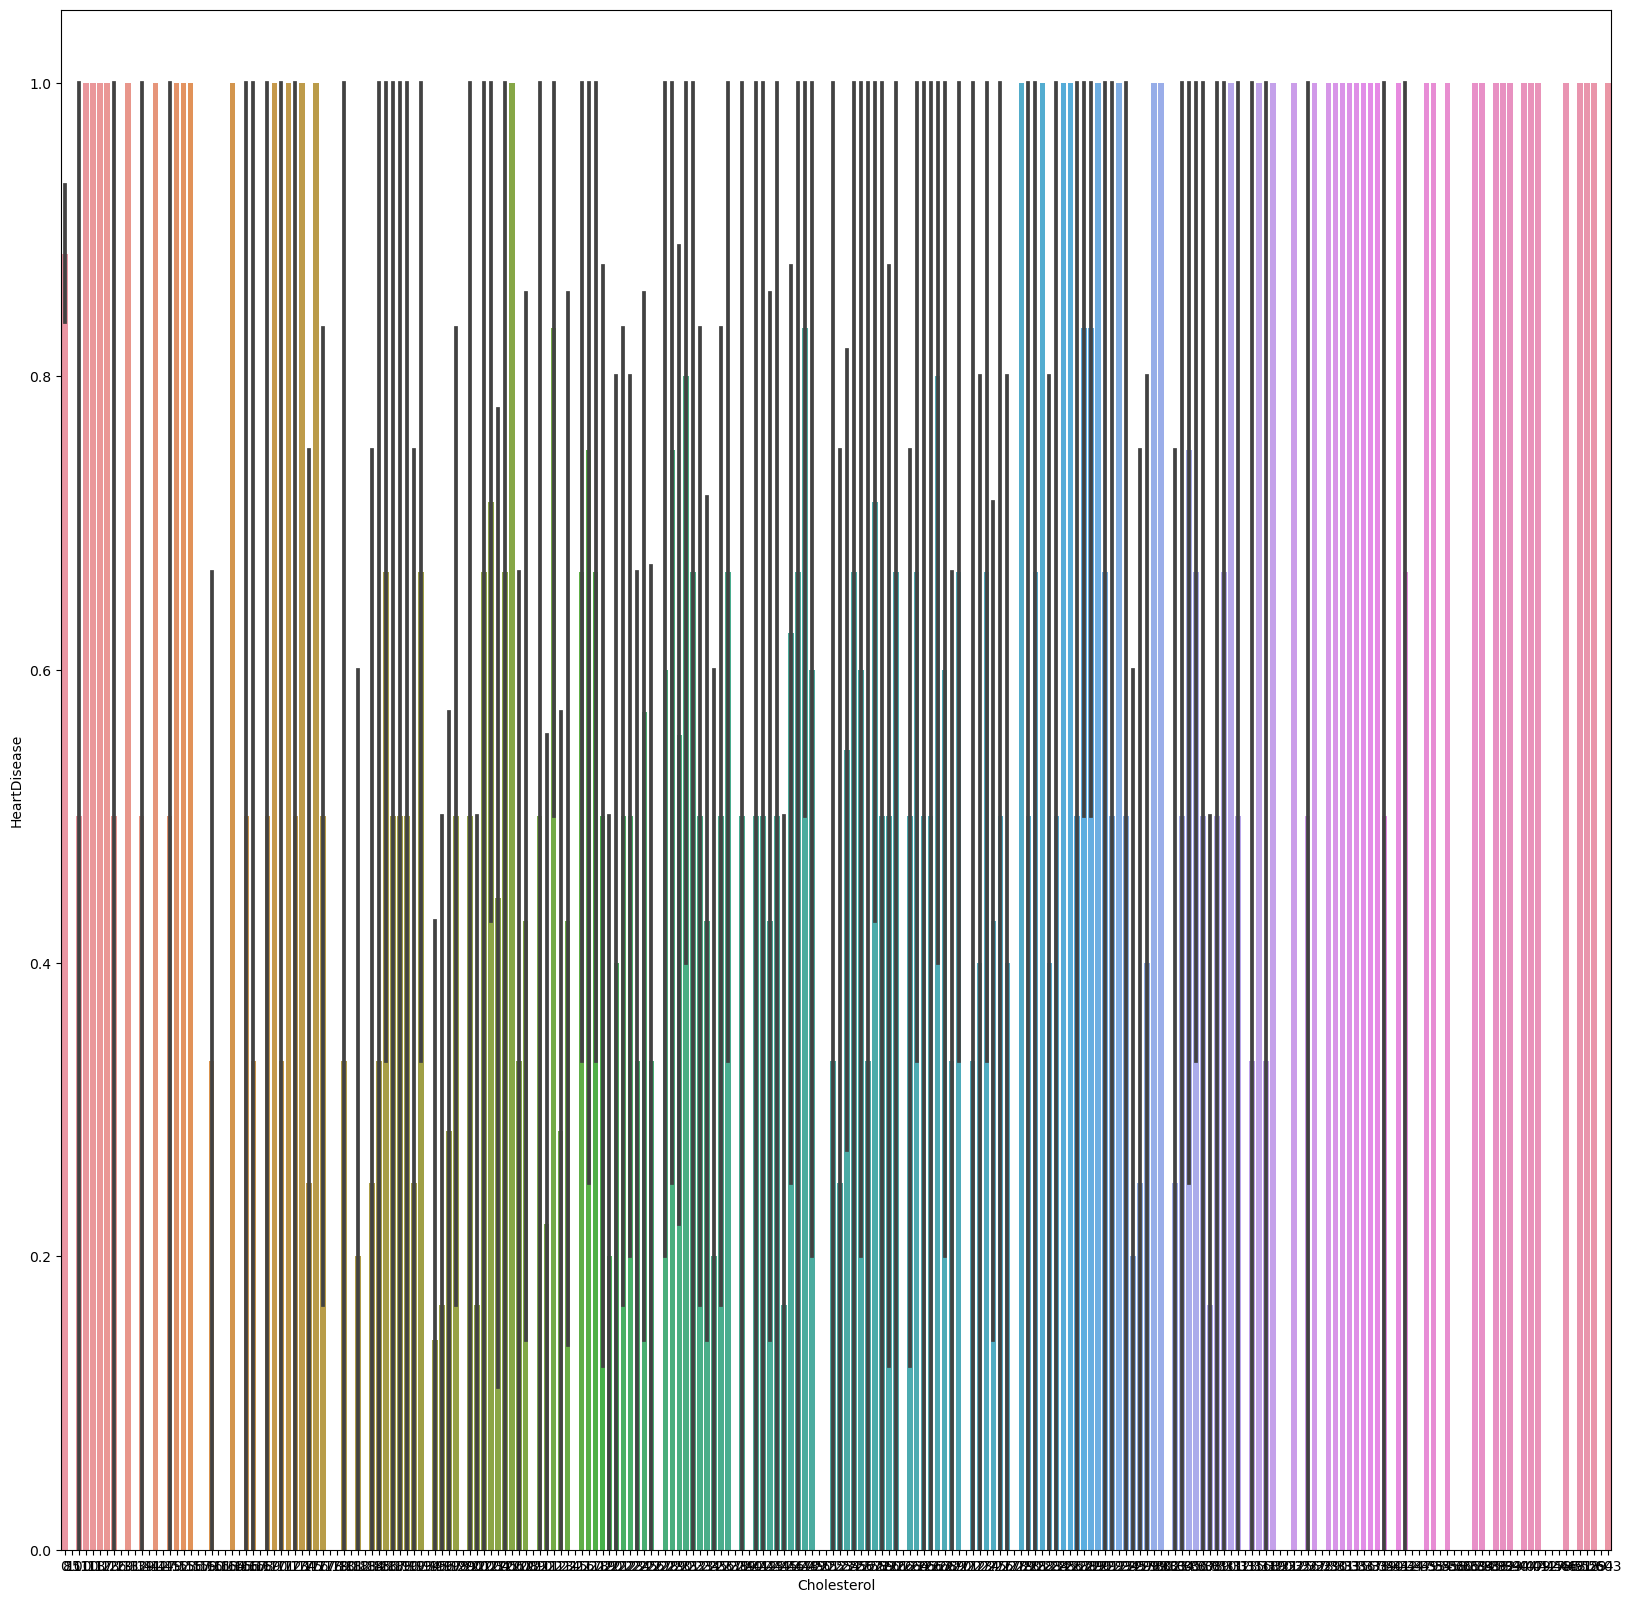

In [19]:
# plot cholesterol against heart disease

fig, ax = plt.subplots(figsize=(20, 20))
sb.barplot(ax=ax, x="Cholesterol", y="HeartDisease", data=data)

In [20]:
# find top 10 cholesterol levels of people that suffer from heart disease 

count_by_cholesterol = heartDisease_positive_data.groupby('Cholesterol')['HeartDisease'].sum().reset_index()

top_10_by_cholesterol = count_by_cholesterol.sort_values(by='HeartDisease', ascending=False)
top_10_by_cholesterol = top_10_by_cholesterol.head(10)
print(top_10_by_cholesterol)

     Cholesterol  HeartDisease
0              0           152
113          282             7
88           254             6
55           216             6
119          288             5
92           258             5
44           203             5
84           248             5
82           246             5
52           212             5


<AxesSubplot:xlabel='MaxHR', ylabel='HeartDisease'>

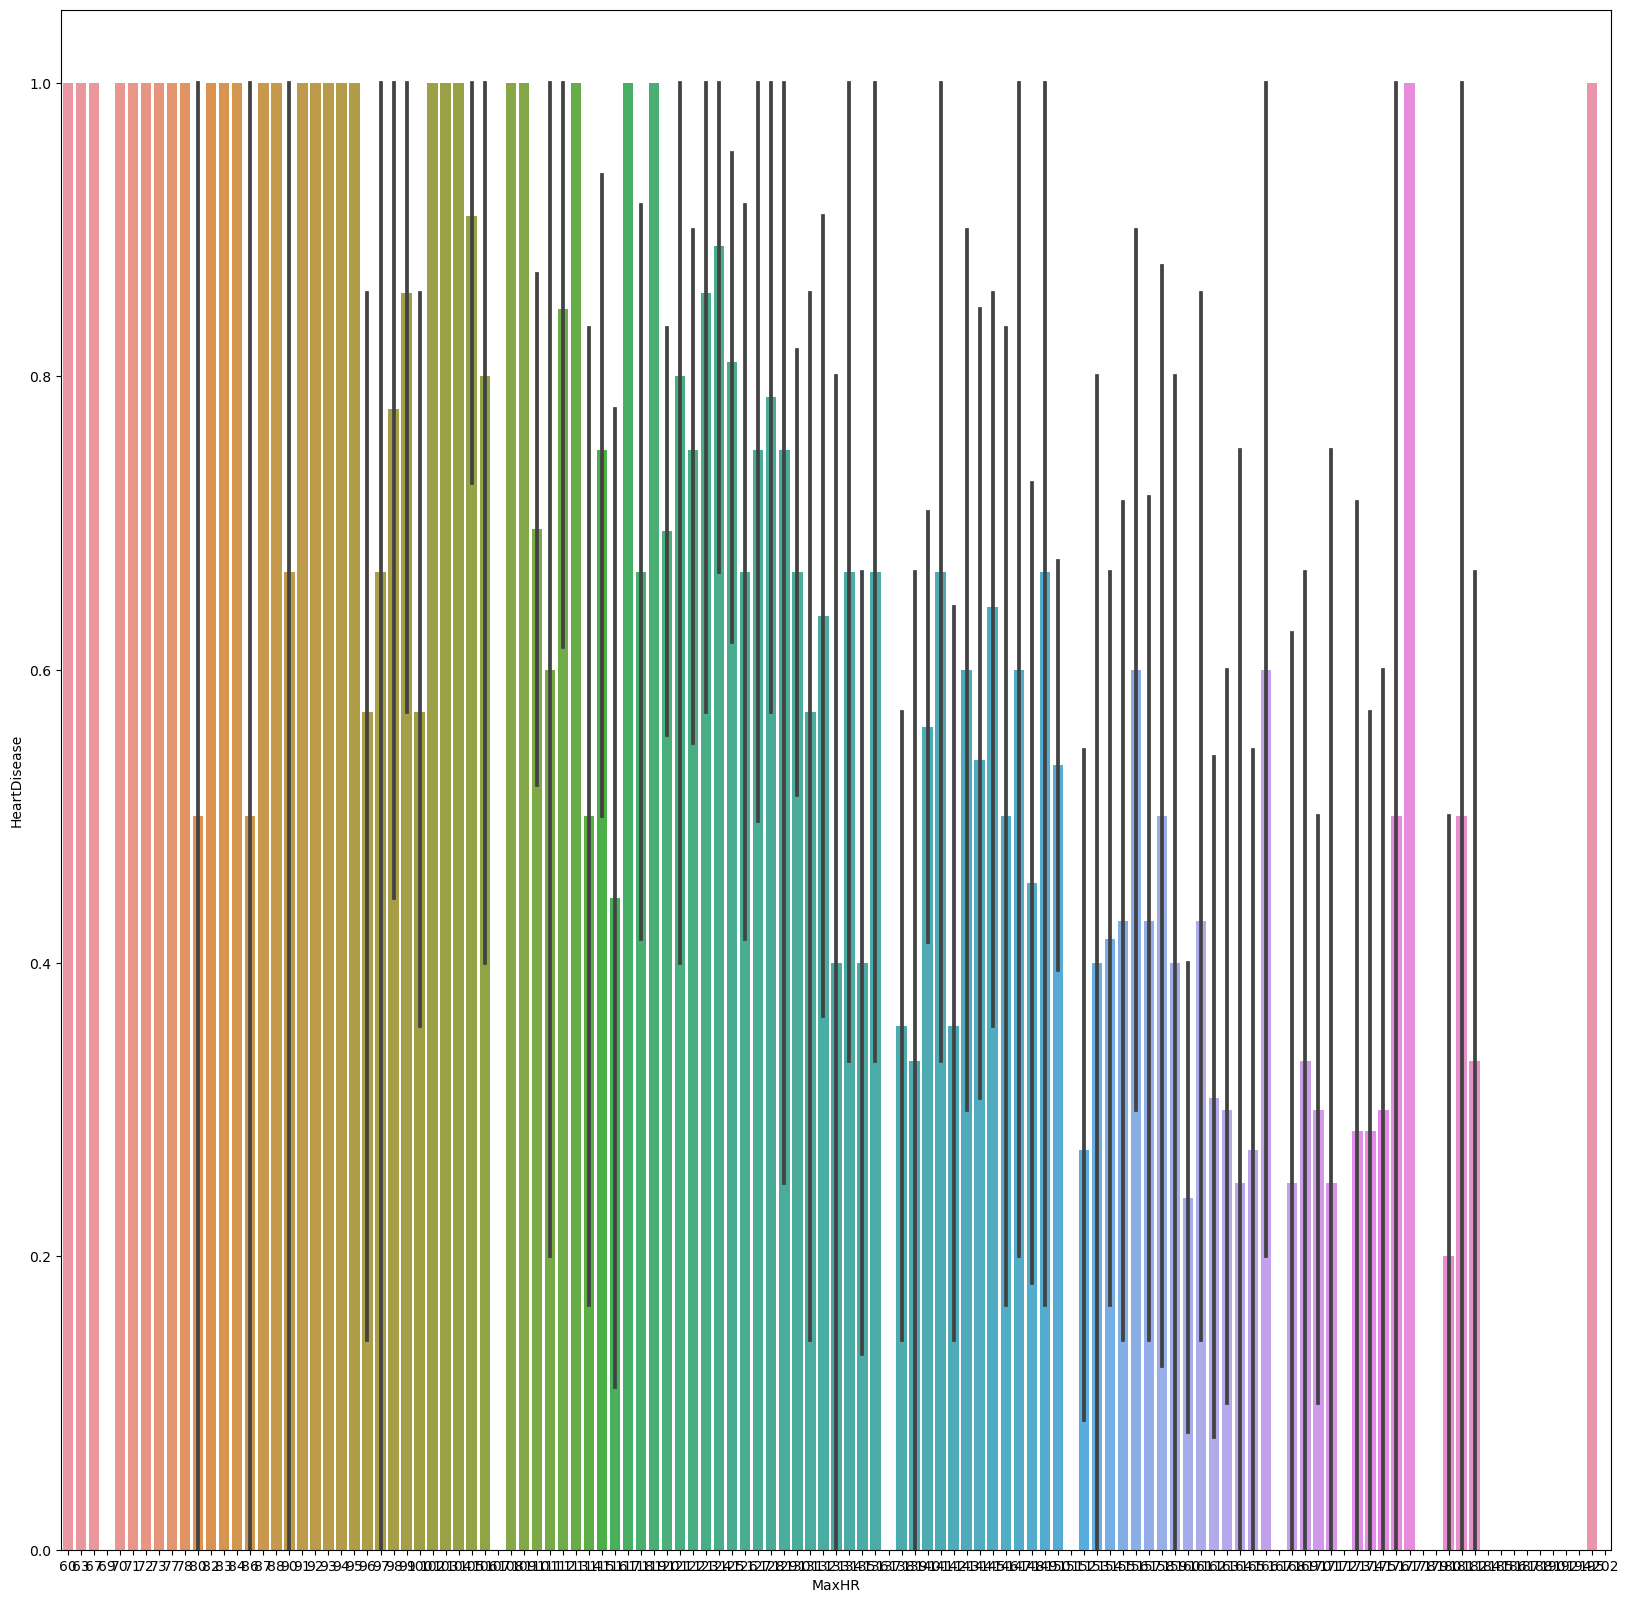

In [21]:
# plot max heartrate against heart disease

fig, ax = plt.subplots(figsize=(20, 20))
sb.barplot(ax=ax, x="MaxHR", y="HeartDisease", data=data)

In [22]:
# find top 10 maximum heart rates of people that suffer from heart disease 

count_by_HR = heartDisease_positive_data.groupby('MaxHR')['HeartDisease'].sum().reset_index()

top_10_by_HR = count_by_HR.sort_values(by='HeartDisease', ascending=False)
top_10_by_HR = top_10_by_HR.head(10)
print(top_10_by_HR)

    MaxHR  HeartDisease
44    120            25
63    140            23
73    150            23
54    130            22
49    125            17
34    110            16
46    122            15
39    115            12
36    112            11
52    128            11
